### Setup

In [2]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

In [3]:
def read_pickle(path):
  with open(path, "rb") as f:
    return pickle.load(f)

def write_pickle(path, object):
  with open(path, "wb") as f:
    return pickle.dump(object, f)

def show_confusion_matrix(conf_matrix, label_names, title=''):
  fig, ax = plt.subplots(figsize=(10, 10))
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=label_names)
  disp.plot(include_values=True,cmap=plt.cm.Blues, ax=ax, values_format=None)
  if title:
    plt.title(title)
  plt.show()

In [4]:
pickle_folder = '..\\..\\data\\pickle'
dataset_folder = 'C:\\Users\\Marko\\source\\repos\\siap\\new\\SIAP\\data\\dataset'

y_validation = read_pickle(os.path.join(pickle_folder, 'ratings_validation.pkl'))
y_validation_pred = read_pickle(os.path.join(pickle_folder, 'ratings_predicted_validation.pkl'))
df_validation = pd.read_csv(os.path.join(dataset_folder, '03_clean','validation_clean_with_emoticons.csv'))

### Classification report

In [5]:
print(classification_report(y_validation, y_validation_pred, target_names=['1', '2', '3', '4', '5']))

              precision    recall  f1-score   support

           1       0.28      0.51      0.36        82
           2       0.26      0.35      0.30       157
           3       0.40      0.44      0.42       282
           4       0.43      0.45      0.44       495
           5       0.86      0.74      0.80      1246

    accuracy                           0.61      2262
   macro avg       0.45      0.50      0.46      2262
weighted avg       0.65      0.61      0.62      2262



### Confusion matrices

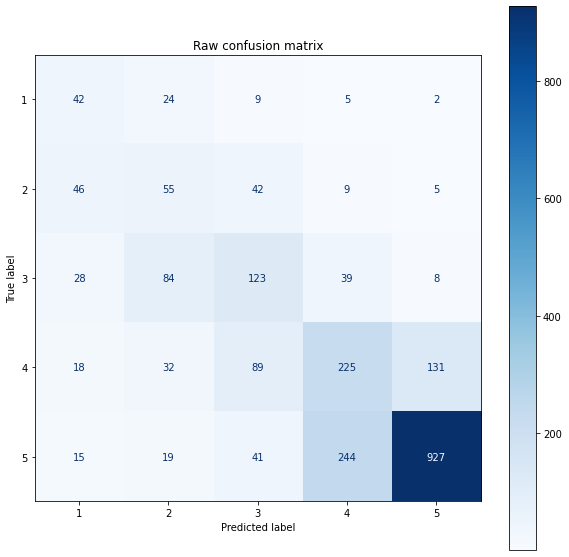

In [6]:
label_names = list(map(lambda x: str(x), list(sorted(set(y_validation)))))
raw_conf_matrix = confusion_matrix(y_true=y_validation, y_pred=y_validation_pred)

show_confusion_matrix(raw_conf_matrix, label_names, title='Raw confusion matrix')

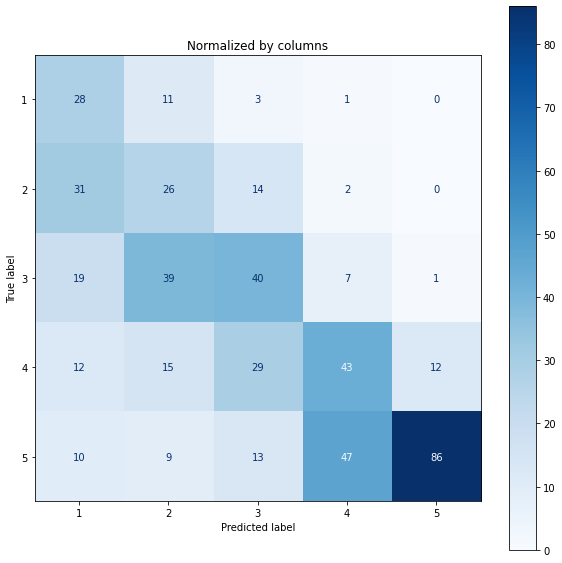

In [7]:
show_confusion_matrix(np.round_(raw_conf_matrix / np.sum(raw_conf_matrix, axis=0)*100), label_names, title='Normalized by columns')

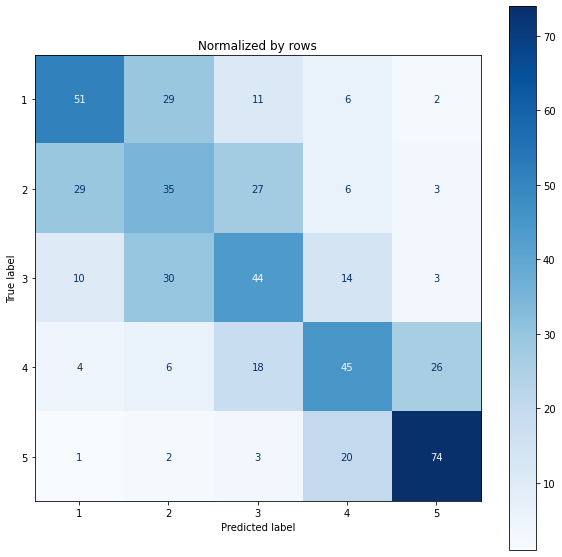

In [8]:
temp = np.sum(raw_conf_matrix, axis=1)
temp = temp.reshape((temp.shape[0], 1))
temp = raw_conf_matrix / temp * 100
show_confusion_matrix(np.round_(temp), label_names, title='Normalized by rows')

💡 Model is biased toward higher ratings, because higher ratings have more examples

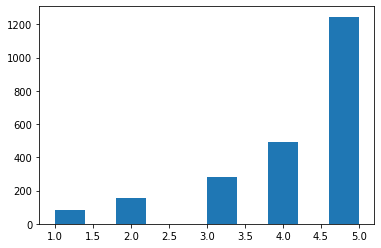

In [9]:
plt.hist(y_validation)
plt.show()

## Compare gold labels with predicted labels

In [10]:
df = pd.DataFrame(np.array([df_validation['Review Text'], y_validation, y_validation_pred]).T, columns=['Review Text', 'Gold Rating', 'Predicted Rating'])
df.head()

,Review Text,Gold Rating,Predicted Rating
0,So this top is adorable light and airy and i l...,4,4
1,I bought this online with the intention of it ...,2,4
2,"Love this sweater! not too long or bulky,true ...",5,5
3,"This is a well-made kimono style jacket, in a ...",4,5
4,I tried this on in the store because i have ha...,5,4


In [11]:
df['Rating Difference'] = df.apply(lambda row: abs(row['Gold Rating'] - row['Predicted Rating']), axis=1)

In [12]:
df.sort_values(by=['Rating Difference'], ascending=False).head()

,Review Text,Gold Rating,Predicted Rating,Rating Difference
1408,Like these pants and they were on sale--does n...,5,1,4
1232,"This is the weirdest, greatest material. it fe...",5,1,4
1454,"When i received this blouse, ai noticed that t...",5,1,4
777,I bought this top in a large. i washed it in c...,5,1,4
161,This skirt is great! the fabric is so soft and...,5,1,4


In [13]:
limit = 50
skip = 40
cnt = 0
for _, row in df.sort_values(by=['Rating Difference'], ascending=False).iterrows():
  if cnt > skip:
    print(f"Gold rating: {row['Gold Rating']}, Predicted rating: {row['Predicted Rating']}")
    print(row['Review Text'])
    print('='*200)
  cnt += 1
  if cnt == limit:
    break

Gold rating: 1, Predicted rating: 4
I loved the dress, but just not dressy enough after rethinking what i needed. very easy order and return. thanks!
Gold rating: 5, Predicted rating: 2
I went into the store to buy this in white after seeing it on the website. i ended up with the blue/gray color. the white was completely see thru. could have worked as a swim cover- but not at this price for me. the blue on the other hand is fine. the fabric is soft and hangs nicely. you can definitely dress it up with some booties and a belt, or keep it laid back with flip flops. i'm sure i'll wear this a bunch this summer. the color is versatile enough that i will pair with leggings and boots
Gold rating: 1, Predicted rating: 4
I found that this dress ran very small. i am true 8, ordered a 10 and it was snug
Gold rating: 5, Predicted rating: 2
I'm always scared of rompers because of my height and long legs. but this one was perfect. it didn't ride up or hit in a weird spot on the hips. it's very flatt

**Patterns:**

1. **Starts with one sentiment, finishes with another - model usually predicts starting sentiment**

Gold rating: 1, Predicted rating: 5<br/>
*Got this in purple and love it! ordered red and silver and only received red so far, but had to return because it was oddly shaped and didn't fit well like the purple. not sure what happens. maybe miss sized?*
<br/><br/>
Gold rating: 1, Predicted rating: 5<br/>
*I loved this dress online and was luckily able to locate it in a store about an hour away from me. i drove to the store to purchase it; however, when i tried it on, i was so disappointed! the print is adorable and it is made of great quality, but the swing style is definitely more than mini! i could have fit 3 of myself in this dress. it is definitely not as depicted in the photographs.*
<br/><br/>
Gold rating: 5, Predicted rating: 2<br/>
*I tried these on at my local retailer, and was like, no way am i spending almost $300 on a pair of jeans. alas, i could not stop thinking about them. the pictures really don't do them justice. they are a more substantial jean, have a distressed look, without being fragile.*
<br/><br/>
Gold rating: 2, Predicted rating: 5<br/>
*This romper fit like a dream! it is gorgeous, unique, and sexy. i am rating this 2 stars because it took me 20 minutes to try it on! there is no zipper and the only way to get it on and off is by buttoning and unbuttoning the small buttons on the top.*
<br/><br/>
2. **A lot of negations but final sentiment does not need to be fully negative**

Gold rating: 4, Predicted rating: 1<br/>
*I tried this on in store yesterday and didn't buy it due to the dolman style sleeves and the scratchy lace. dolman sleeves look terrible on me, so this was a no go. beware the scratchy lace...i had this on for about 2 minutes and was itching. otherwise, this will wok for plenty of people - the color can be a nice neutral. it does run large - i usually wear a large and sized down to a medium. it didn't work for me, but i'm sure some will find it a nice part of their wardrobe.*
<br/><br/>

In [27]:
limit = 10
skip = 0
cnt = 0
gold_rating = 2
predicted_rating = 3
for _, row in df[(df['Gold Rating'] == gold_rating) & (df['Predicted Rating'] == predicted_rating)].iterrows():
  if cnt > skip:
    print(f"Gold rating: {row['Gold Rating']}, Predicted rating: {row['Predicted Rating']}")
    print(row['Review Text'])
    print('='*200)
  cnt += 1
  if cnt == limit:
    break

Gold rating: 1, Predicted rating: 2
I got the blue. it is very short. one side of the shirt i received was shorter that the other. the material feels cheap and pleats out a bit right over the bust - only flattering on small busted models.
Gold rating: 1, Predicted rating: 2
This top runs super small in the upper arms, shoulder area..could not even stretch out my arms! ...other then that major problem, the length and body fit were perfect...i am true med and/or large in all retailer tops so i tried sizes 10, 12 and neither worked for me due to arm/shoulder fit...disappointed because it really is a beautiful top...
Gold rating: 1, Predicted rating: 2
This sweater was huge, it hung down to my calves! it also is really bulky and scratchy, it feels as if you are wearing an old wool blanket. i think it is only made for really tall and skinny people. i'm 5'2" and weigh 120lbs. and i ordered a size s, and i was swimming in it. the fabric is very thick, i may be great if you live in alaska or t

**Patterns:**

1. **Mainly positive sentiment with one litle complainment - probably because of that, model doesn't give 5 rating**

Gold rating: 5, Predicted rating: 4<br/>
<br/>
*Very pretty dress! wearing it for a family beach portrait. it may run a little big but not terribly. it is also not super long as pictured. i'm 5'6 and it's perfect with a flat.*
<br/><br/>
*Super cute, well made, great embroidery. waist runs big.*
<br/><br/>
*I like this dress a lot. it does not have much form but with a belt looks great!*

2. **Fully positive sentiment, no reason to give lower than 5 rating - that is probably why model gives 5 rating**

Gold rating: 4, Predicted rating: 5<br/>
<br/>
*I love this vest, good denim quality*
<br/><br/>
*Tried this on in the store, very soft and hangs well, better on, than the hanger. needless to say i bought it!*
<br/><br/>
*I love the color of this top. it is a dark olive green and elegant. i mostly wear it under a blazer with my jeans. it fits true to size and the smocking detail is casual and elegant at the same time.*
<br/><br/>
*Love this dress. wear it with sneakers or boots. can add a belt, or the right accessories to dress it up.*
<br/><br/>

3. **Negative sentiment, with elements of positive sentiment(buyers hoped that it can be good purchase) - model should learn to better recognize positive elements in review**

Gold rating: 2, Predicted rating: 1<br/>
<br/>
*Cup size is really small for a medium. no way to adjust the back strap. ended up giving it to my daughter. cute but so poorly executed.*
<br/><br/>
*Unfortunately, this dress is shaped like a sack and has no shape to speak of. i have sent it back for a refund :( too big, too shapeless.*
<br/><br/>
*It was huge. material looked good but was too bulky. will be returning it.*
<br/><br/>
*Cute in the on line photo but in person it looks cheap and has gold running through it. if you look really close in the photo you can see it.*
<br/><br/>

4. **Starts with positive sentiment, ends with negative sentiment - A lot of positive words in all parts of review, maybe that is the reason why model gives higher rating**

Gold rating: 2, Predicted rating: 3<br/>
<br/>
*It's a cute topper. it fits nicely through the shoulders and arms, and because of the a-line, through the bottom. but the chest is 3 sizes too small and i don't have a big chest. the fabric is very scratchy, and mine arrived unbuttoned and unzipped, and i suspect it had been worn. going back. not tracy reese's best piece.*
<br/><br/>
*This dress looks very beautiful on the model shown. unfortunately, when i tried it on, it did not flow as nicely as i would have liked it to. i also didn't care much for the waist ties on the side. an elastic waist might have been better.*
<br/><br/>
*I loved the look of this sweater on-line, but it just didn't work for me. the fit wasn't good enough. the style okay. the color fine. the feel, scratchy. overall, it did not work for my body.*
<br/><br/>
*Pretty design, but when i tried it on, the fabric was thin and delicate. i don't think it would last long with much wear. too bad. if the fabric were sturdier, it'd be great as the cut is flattering and i love the pockets.*
<br/><br/>